In [13]:
#TAREAS DE LOS MÓDULOS DE CNN Y RNN - MIAX9
#Para cada uno de los siguientes ejercicios entregar un fichero en ipython notebook  (.ipynb).
#En cada fichero tenéis que solucionar un ejercicio distinto, es importante que comentéis la
#solución que habéis realizado y los resultados obtenidos.
#El código ha de ser compilable desde Google Colab (utilizando el entorno de Colab), y no
#ha de contener errores. En los casos en los que se pide entrenar un modelo razona sobre
#Vla evolución del error de entrenamiento y de validación durante el entrenamiento.
#La práctica deberá realizarse de manera individual y debe entregarse en la plataforma de
#Instituto BME.

In [14]:
#4.- Entrena un modelo en Keras que combine capas GRU y convolucionales para estimar
#los valores de apertura de Microsoft utilizando como entrada únicamente los valores de
#apertura de los datos Microsoft de los 10 días anteriores y que obtenga unos resultados
#en test mejores que los del apartado anterior.

In [15]:
#from __future__ import absolute_import, division, print_function, unicode_literals
# Installa TensorFlow
# %tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)


import numpy as np
import pandas as pd

from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D

import matplotlib.pyplot as plt
%matplotlib inline

2.11.0


In [16]:
def datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model):
    salida=np.zeros((17))
    #trainableParams
    salida[0] = np.sum([np.prod(v.get_shape()) for v in model.trainable_weights])
    #nonTrainableParams
    salida[1] = np.sum([np.prod(v.get_shape()) for v in model.non_trainable_weights])
    #totalParams
    salida[2] = salida[0] + salida[1]
    
    #Train
    score = model.evaluate(x_train, t_train)
    salida[3] = score[0]
    salida[4] = score[1]
    y_hat = model.predict(x_train)
    # El  error de la predicion en train
    salida[5] = np.mean(abs(y_hat[:,0]-t_train))
    # La media de error en la prediccion en train 
    salida[6] =np.mean(np.abs(t_train))
    
    #Test
    score = model.evaluate(x_test, t_test)
    salida[7] = score[0]
    salida[8] = score[1]
    y_hat_test = model.predict(x_test)
    # El  error de la predicion en test
    salida[9] = np.mean(abs(y_hat_test[:,0]-t_test))
    # La media de error en la prediccion en test
    salida[10] = np.mean(np.abs(t_test))
    
    # numero de datos de entrada en train
    salida[11] = x_train.shape[0]
    #dimensiones de la entrada
    salida[12] =len(x_train.shape)
    # valor de la dimension 1 de la entrada
    if salida[12] >= 1:
        salida[13] = x_train.shape[0]
    # valor de la dimension 2 de la entrada
    if salida[12] >= 2:
        salida[14] = x_train.shape[1]
    # valor de la dimension 3 de la entrada
    if salida[12] >= 3:
        salida[15] = x_train.shape[2]
    # valor de la dimension 4 de la entrada
    if salida[12] >= 4:
        salida[16] = x_train.shape[3]
    
    print(len(salida))
    
    import pandas as pd 
    df = pd.read_csv ('metricas.csv', index_col=0) 
    print(df.shape)
    df[model_title] = salida
    df.to_csv('metricas.csv') 

    return salida, df


In [17]:
def sacar_open_Microsoft_normalizado_y_con_numero_de_valores ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    msft_op = dd_msft['Open'].values
    print(msft_op.shape)
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(msft_op)

    DAT = msft_op
    DAT.shape

    # Los coloco todos juntos en un dataset. Asi luego me sale tambien los numeros de variables que lo nesitla el model  convolucional
    # DAT = np.zeros((data_googl.shape[0],3))
    DAT_1 = np.zeros((msft_op.shape[0],1))
    DAT_1[:,0] = DAT
    # Los ploteo
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT_1[:,0])
    print(DAT_1.shape)
    
    # Hacemos el log y la rentabilidad para que no haya correlacion entre los valores y el ####################
    DAT_rent = np.diff(np.log(DAT_1),axis=0)
    print(DAT_rent.shape)
    # Los ploteo
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT_rent[:,0])
   
    return DAT_rent

In [18]:
def sacar_open_Microsoft_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ():
    # Para leer datos lo mejor es usar la toolbox pandas
    # Los datos se han sacado de:
    # https://www.kaggle.com/borismarjanovic/price-volume-data-for-all-us-stocks-etfs/version/3
    dd_msft = pd.read_csv("msft.us.txt", delimiter=",")
    msft_op = dd_msft['Open'].values
    print(msft_op.shape)
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(msft_op)

    DAT = msft_op
    DAT.shape

    # #deberia normalizar entre 0 y 1; que se haria de forma facil
    # # # Normalizo los valores para que trabaje de 0 a 1 luego el nn.
    valor_a_normalizar = DAT.max()
    DAT = DAT/ valor_a_normalizar

    # Los coloco todos juntos en un dataset. Asi luego me sale tambien los numeros de variables que lo nesitla el model  convolucional
    # DAT = np.zeros((data_googl.shape[0],3))
    DAT_1 = np.zeros((msft_op.shape[0],1))

    DAT_1[:,0] = DAT
    # Los ploteo
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT_1[:,0])
    print(DAT_1.shape)
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.figure()
    plt.plot(DAT_1[:,0])
    #plt.plot(DAT_rent[:,1])
    #plt.plot(DAT_rent[:,2])
       
    
    return DAT_1



In [19]:
def Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG,DAT_1):
    # Reordeno el dataset para hacer bloques de LAG dias
    #LAG = 11
    DAT_TS = np.zeros((DAT_1.shape[0]-LAG,LAG,DAT_1.shape[1]))

    for ii in range(0,DAT_1.shape[0]-LAG):
        #print(DAT_TS.shape)
        #print(DAT_1.shape)
        DAT_TS[ii,:,:] = DAT_1[ii:ii+LAG,:]
    # Tengo (#muestras,#longitud,#variables)

    #Separaro todo el dataset en los datos de apertura de 10 días anteriores para estimar el valor del día
    #actual
    #Ntr = np.floor(DAT_TS.shape[0]/2)
    Ntr = np.floor(DAT_TS.shape[0])
    data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]

    Y_target = 0
    data_y = DAT_TS[range(0,np.int(Ntr)),LAG-1,Y_target]



    #hago el split de train y test
    from sklearn.model_selection import train_test_split
    x_train, x_test, t_train, t_test = train_test_split(data_x, data_y, test_size=0.33, random_state=12)
    return x_train, x_test, t_train, t_test


In [20]:
# Evaluamos el modelo segun los datos mas generales para evaluarlo

def graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist):
    #Train
    score = model.evaluate(x_train, t_train)
    print('SCORE DE TRAIN:')
    print(score)

    #Test
    print('SCORE DE TEST:')
    score_1 = model.evaluate(x_test, t_test)
    print(score_1)

    n_epochs = len(hist.history['loss'])
    hd = hist.history
    epochs = range(1, n_epochs+1)
    plt.figure(figsize=(12,6))
    plt.subplot(1,2,1)
    plt.plot(epochs, hd['accuracy'], "r", label="train")
    plt.plot(epochs, hd['val_accuracy'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, hd['loss'], "r", label="train")
    plt.plot(epochs, hd['val_loss'], "b", label="valid")
    plt.grid(True)
    plt.xlabel("epoch")
    plt.ylabel("loss")
    plt.title("Loss")
    plt.legend()
    plt.show()
    return score, score_1

In [21]:
#Cree esta funcion segun lo que Valero son ensenaba en clase
def ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model):
    
    #ESTUDIO GRAFICO DE RESULTADOS PARA EVALUAR
    # Evaluamos el modelo en train
    score = model.evaluate(x_train, t_train, verbose=0)
    print(f'Evaluamos el modelo en train_score: {score}')

    # Predecimos con los datos de train
    y_hat = model.predict(x_train)
    print(f'Predecimos con los datos de train: {np.mean(abs(y_hat[:,0]-t_train))}')
    print(f'Predecimos con los datos de train_cantidad/dimensiones de datos:{y_hat.shape}')
    print(f' La media de error en la prediccion en entrenamiento es: {np.mean(np.abs(t_train))}')

    # Predecimos con los datos de test
    y_hat_test = model.predict(x_test)
    print(f' El  error de la predicion usando datos de test es de : {np.mean(abs(y_hat_test[:,0]-t_test))}')
    print(f' La media de error en la prediccion en test es: {np.mean(np.abs(t_test))}')

    import matplotlib.pyplot as plt
    %matplotlib inline
    fig, ((ax1, ax2),(ax3, ax4),(ax5,ax6)) = plt.subplots(3, 2, figsize=(20, 10)) 
    # Mostramos las predicciones de entrenamiento
    print(f'Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:')

    #plt.figure()
    ax1.plot(y_hat[:,0], label='y_hat[:,0] datos')    
    ax1.plot(t_train, label='t_train predicciones')
    ax1.grid(True)
    #ax1.xlabel("valores")
    #ax1.ylabel("nuero de dato ordinalmente")
    ax1.legend()

    #plt.figure()
    ax2.plot(t_train,y_hat[:,0],'.', label='t_train VSy_hat[:,0],')
    ax2.grid(True)
    #ax2.xlabel("t_train")
    #ax2.ylabel("y_hat[:,0],")
    ax2.legend()

    # Mostramos las predicciones de test
    ax3.plot(y_hat_test[:,0], label='y_hat_test[:,0] datos')
    ax3.plot(t_test, label=' t_testpredicciones')
    ax3.grid(True)
    #ax3.xlabel("valores")
    #ax3.ylabel("nuero de dato ordinalmente")
    ax3.legend()

    ax4.plot(t_test,y_hat_test[:,0],'.', label='t_test VS y_hat_test[:,0]')
    ax4.grid(True)
    #ax4.xlabel("t_test")
    #ax4.ylabel("y_hat_test[:,0]")
    ax4.legend()

    
    ax5.plot(model.weights[0].numpy().reshape(-1),'o-',label="Pesos neurona primera capa")
    ax5.grid(True)
    #ax5.xlabel("numero de la neurona ordinalmente")
    #ax5.ylabel("peso de la neurona")
    #ax5.title("Pesos neurona primera capa")
    ax5.legend()
    
    return



In [22]:
def activo_caso_1(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D, Conv1D, MaxPooling1D, GRU
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt
    # si nos dejara el enunciado poner una densa al final; la densa aprende.
    # Entendi en clase que la parte de convoluciones establece caracteriticas
    # y la densa es la que va a ajustando y aprendiendo a partir d eals caracteriticas 
    # que la parte concolucional saca
    # Definimos un modelo con dos capa convolucional 1D y 1 capa densa
    model = Sequential()
    model.add(Conv1D(10, 3, input_shape=x_train.shape[1:],padding='same'))
    model.add(Conv1D(10, 3, activation='relu',padding='same'))#,input_shape=x_train.shape[1:],))
    #model.add(Flatten())
    model.add(GRU(1))
    
    
    # model = Sequential()
    # model.add(Conv1D(15,3, input_shape=(10,1),padding='same'))
    # #model.add(Conv1D(5,3, input_shape=(10,1),padding='valid'))
    # #model.add(MaxPooling1D(2))
    # #model.add(Bidirectional(GRU(5,return_sequences=True), input_shape=(10,1), merge_mode="ave")
    # model.add(GRU(5))
    # model.add(Flatten())
    # model.add(Dense(1))

    #model.summary()

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist



In [23]:
def activo_caso_2(x_train, x_test, t_train, t_test):
    
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout,MaxPooling2D 
    from tensorflow.keras.layers import Conv1D, MaxPooling1D, GRU, GlobalAveragePooling1D,GlobalMaxPooling1D
    from tensorflow.keras import regularizers
    import tensorflow as tf
    from tensorflow import keras
    import numpy as np
    import matplotlib.pyplot as plt
    from time import time
    import shutil

    !pip install -q -U keras-tuner
    import keras_tuner as kt
    model = Sequential()
    model.add(GRU(10, input_shape=(10,1),return_sequences=True))
    model.add(Conv1D(5, 3, activation='relu',padding='same'))
    model.add(Conv1D(1, 3, activation='relu',padding='same'))
    model.add(GlobalAveragePooling1D())

    # Compilamos el modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mean_squared_error', metrics=['accuracy'])
    #model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss = 'mae', metrics=['accuracy'])
    model.summary()

    # Vamos a usar el callback de earlystopping y ReduceLROnPlateau
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    #early_stopping = EarlyStopping(monitor='val_loss', patience=12, min_delta=0.1)
    early_stopping = EarlyStopping(monitor='loss', patience=12, min_delta=0.1)

    #reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,patience=5, min_lr=0.01)
    reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.2,patience=5, min_lr=0.1)


    # Entrenamos el modelo, nos guardamos la evolución en 'history' 
    # Esto es equivalente a usar callbacks para history
    hist = model.fit(x_train, t_train, batch_size=32, epochs=100, verbose=1, validation_split = 0.1) # antes epochs=1000
    
    #Parametros para evaluar
    score_train, score_test = graficas_y_valores_estandar_evaluacion_modelo(x_train, t_train,x_test, t_test, model, hist)
    ESTUDIO_GRAFICO_DE_RESULTADOS_PARA_EVALUAR(x_train, x_test, t_train, t_test, model)
    
    return model, hist

(7983,)
(7983, 1)
(7982, 1)


<ipython-input-19-e2e420c65a59>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-19-e2e420c65a59>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.6/169.6 KB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 55.5 MB/s eta 0:00:00
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 10, 10)            40        
                                                                 
 conv1d_1 (Conv1D)           (None, 10, 10)            310       
                                                                 
 gru (GRU)                   (None, 1)                 39        
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
151/151 [==============================] - 13s 8ms/step - loss: 5.2335e-04 - accuracy: 0.0953 - val_loss: 5.6109e-04 - val_accuracy: 0.0974
Epoch 2/10

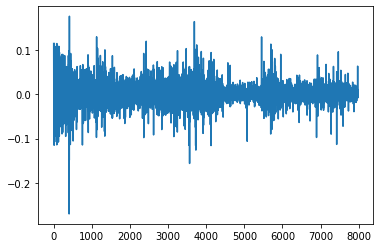

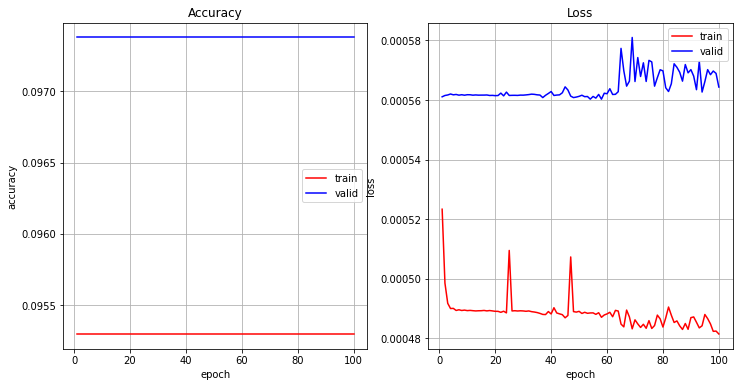

Evaluamos el modelo en train_score: [0.0004897225880995393, 0.09550561755895615]
167/167 [==============================] - 1s 2ms/step
Predecimos con los datos de train: 0.014907354994234527
Predecimos con los datos de train_cantidad/dimensiones de datos:(5340, 1)
 La media de error en la prediccion en entrenamiento es: 0.014863497953216202
83/83 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.015492363332330944
 La media de error en la prediccion en test es: 0.015448941272222535
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
83/83 [==============================] - 0s 2ms/step
17
(17, 54)


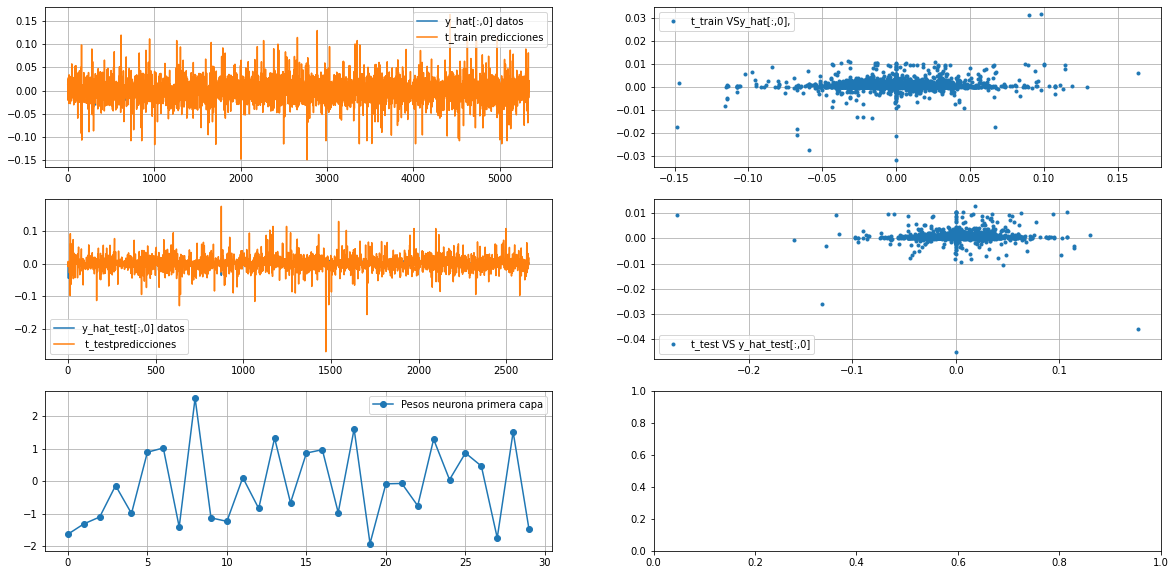

In [24]:
DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores ()
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_4_CASO_1_Conv1D(10, 3_Conv1D(1, 3_GRU(10_CON_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(7983,)
(7983, 1)
(7982, 1)


<ipython-input-19-e2e420c65a59>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-19-e2e420c65a59>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_1 (GRU)                 (None, 10, 10)            390       
                                                                 
 conv1d_2 (Conv1D)           (None, 10, 5)             155       
                                                                 
 conv1d_3 (Conv1D)           (None, 10, 1)             16        
                                                                 
 global_average_pooling1d (G  (None, 1)                0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
151/151 [==============================] - 6s 14ms/step - loss: 5.2140e-04 - accuracy: 0.0953 - val_loss: 5.61

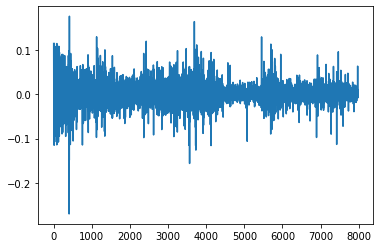

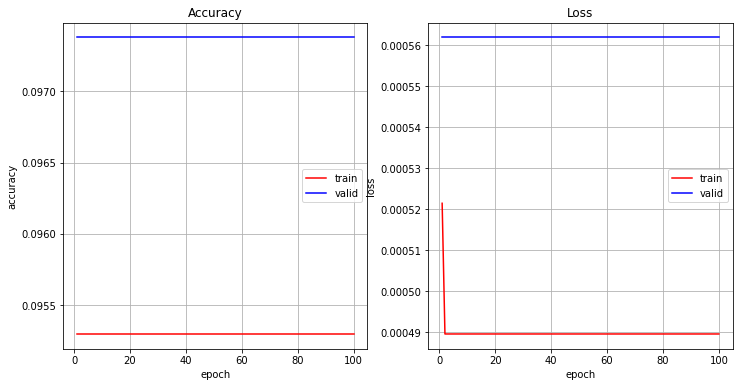

Evaluamos el modelo en train_score: [0.0004967540735378861, 0.09550561755895615]
167/167 [==============================] - 1s 2ms/step
Predecimos con los datos de train: 0.014863497953216202
Predecimos con los datos de train_cantidad/dimensiones de datos:(5340, 1)
 La media de error en la prediccion en entrenamiento es: 0.014863497953216202
83/83 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.015448941272222535
 La media de error en la prediccion en test es: 0.015448941272222535
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
83/83 [==============================] - 0s 3ms/step
17
(17, 54)


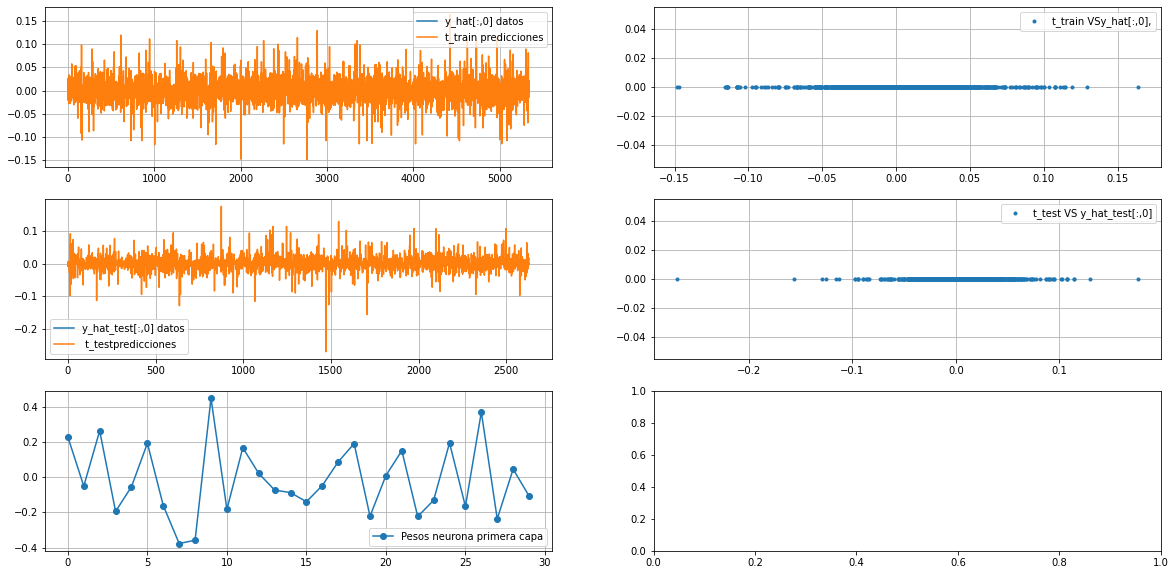

In [25]:
DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores ()
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_4_CASO_1_GRU(10_Conv1D(10, 3_Conv1D(10, 3_CON_REG.LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(7983,)
(7983, 1)


<ipython-input-19-e2e420c65a59>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-19-e2e420c65a59>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 10, 10)            40        
                                                                 
 conv1d_5 (Conv1D)           (None, 10, 10)            310       
                                                                 
 gru_2 (GRU)                 (None, 1)                 39        
                                                                 
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
151/151 [==============================] - 6s 15ms/step - loss: 0.0053 - accuracy: 2.0807e-04 - val_loss: 1.3770e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
151/151 [==============================] - 1s 9ms/step - loss: 1.2590e-04 - accuracy: 2.0807e-04 - val_loss: 1.2568e-04 - val_accuracy: 0.0000e+00
Epoch

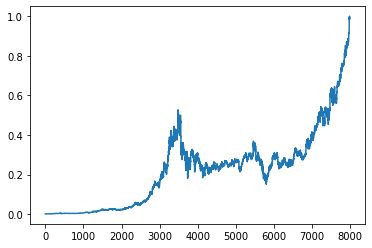

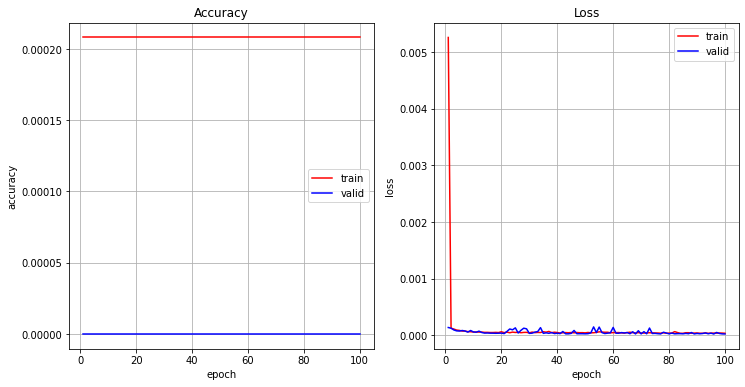

Evaluamos el modelo en train_score: [2.7213749490329064e-05, 0.00018723084940575063]
167/167 [==============================] - 1s 2ms/step
Predecimos con los datos de train: 0.00298297618844937
Predecimos con los datos de train_cantidad/dimensiones de datos:(5341, 1)
 La media de error en la prediccion en entrenamiento es: 0.22105163121100596
83/83 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.0031185199768137845
 La media de error en la prediccion en test es: 0.23016269497892813
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
83/83 [==============================] - 0s 2ms/step
17
(17, 54)


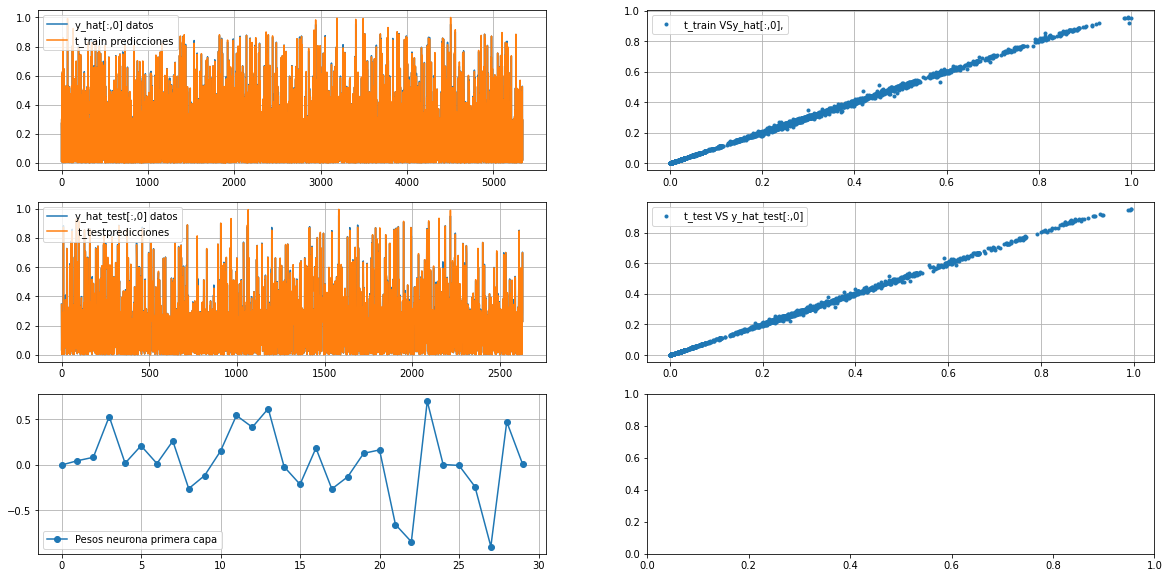

In [26]:
DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)
model, hist = activo_caso_1(x_train, x_test, t_train, t_test)
model_title = 'EJ_4_CASO_1_Conv1D(10, 3_Conv1D(1, 3_GRU(10_NORM_Y_SIN_RETORNO_LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

(7983,)
(7983, 1)


<ipython-input-19-e2e420c65a59>:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_x = DAT_TS[range(0,np.int(Ntr)),0:LAG-1,:]
<ipython-input-19-e2e420c65a59>:19: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in Nu

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_3 (GRU)                 (None, 10, 10)            390       
                                                                 
 conv1d_6 (Conv1D)           (None, 10, 5)             155       
                                                                 
 conv1d_7 (Conv1D)           (None, 10, 1)             16        
                                                                 
 global_average_pooling1d_1   (None, 1)                0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 561
Trainable params: 561
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
151/151 [==============================] - 6s 15ms/step - loss: 9.7849e-04 - accuracy: 2.0807e-04 - val_loss: 

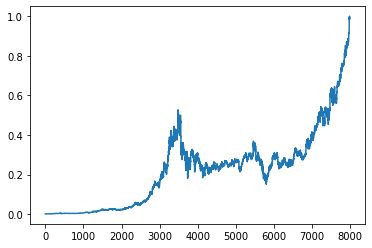

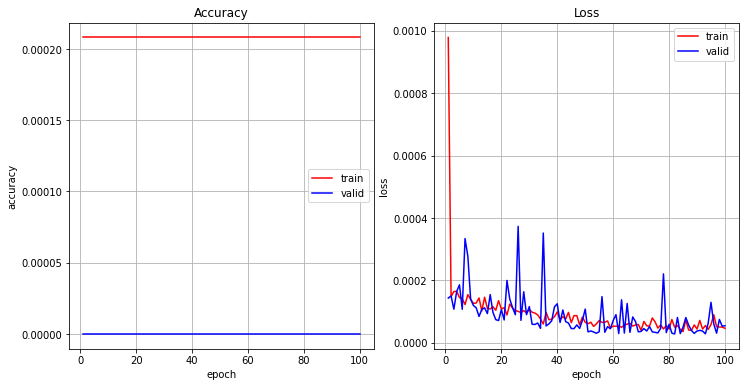

Evaluamos el modelo en train_score: [5.118119588587433e-05, 0.00018723084940575063]
167/167 [==============================] - 1s 2ms/step
Predecimos con los datos de train: 0.00539967305987981
Predecimos con los datos de train_cantidad/dimensiones de datos:(5341, 1)
 La media de error en la prediccion en entrenamiento es: 0.22105163121100596
83/83 [==============================] - 0s 2ms/step
 El  error de la predicion usando datos de test es de : 0.005559972272392334
 La media de error en la prediccion en test es: 0.23016269497892813
Mostramos las predicciones de entrenamiento en primera fila y de test en segunda fila:
83/83 [==============================] - 0s 2ms/step
17
(17, 54)


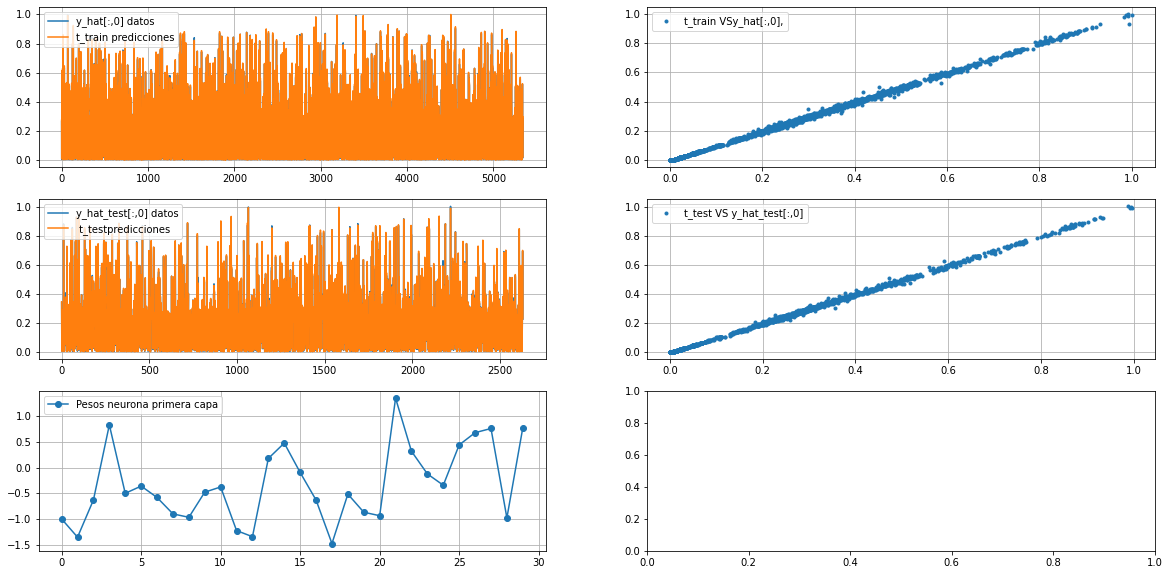

In [27]:

DAT_1 = sacar_open_Microsoft_normalizado_y_con_numero_de_valores_SIN_RETORNO_LOG ()
x_train, x_test, t_train, t_test = Reordeno_dataset_en_bloques_LAG_dias_y_siguiente_dia_predice_y_split(LAG = 11,DAT_1 = DAT_1)
model, hist = activo_caso_2(x_train, x_test, t_train, t_test)
model_title = 'EJ_4_CASO_1_GRU(10_Conv1D(10, 3_Conv1D(10, 3_NORM_Y_SIN_RETORNO_LOG.'
salida, df = datos_para_comparar_modelos (x_train, t_train, x_test, t_test, model)

In [28]:
# CONCLUSION DE COMPARA EJERCICIO 3 Y 4:
# valores mirando solo el loss de test y train como se hacia en clase:
# 'EJ_3_CASO_1_LINEAL_TONTO_CON_REG.LOG.'
# SCORE DE TRAIN: [0.023484662175178528, 0.09550561755895615]
# SCORE DE TEST: [0.023326978087425232, 0.08551881462335587]

# 'EJ_3_CASO_2_Conv1D(10,3,.Conv1D(10,3.MaxPooling1D.Conv1D(1,3_CON_REG.LOG.'
# SCORE DE TRAIN: [0.0005020375247113407, 0.09550561755895615]
# SCORE DE TEST: [0.0005627037608064711, 0.08551881462335587]

# 'EJ_3_CASO_3_Conv1D(10,3,.Conv1D(10,3.Flatten.Dense(1_CON_REG.LOG.'
# SCORE DE TRAIN:[0.000494942010845989, 0.09550561755895615]
# SCORE DE TEST: [0.0005598939605988562, 0.08551881462335587]

# 'EJ_3_CASO_1_LINEAL_TONTO_normalizado_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.017413152381777763, 0.00018723084940575063]
# SCORE DE TEST:[0.017069626599550247, 0.0]
# este habia bajado mas si se le hubiera subido las epocas. 
# Pero para este hercicio entiendo que vale.

# 'EJ_3_CASO_2_Conv1D(10,3,.Conv1D(10,3.MaxPooling1D.Conv1D(1,3_normalizado_SIN_REG.LOG.'
# SCORE DE TRAIN: [0.036640606820583344, 0.0]
# SCORE DE TEST: [0.03894549235701561, 0.0]

# 'EJ_3_CASO_3_Conv1D(10,3,.Conv1D(10,3.Flatten.Dense(1_normalizado_SIN_REG.LOG.'
# SCORE DE TRAIN: [6.227159610716626e-05, 0.00018723084940575063]
# SCORE DE TEST: [7.339258445426822e-05, 0.0]

# Puedo mirar mas metricas o los valores expuestos antes; que lo hago en el ej 10;
# Pero mirando solo las loss en train y test entre ejercicios:

# 'EJ_4_CASO_1_Conv1D(10, 3_Conv1D(1, 3_GRU(10_CON_REG.LOG.'
# SCORE DE TRAIN: [0.0004962933016940951, 0.09550561755895615]
# SCORE DE TEST: [0.0005608397768810391, 0.08551881462335587]

# 'EJ_4_CASO_1_GRU(10_Conv1D(10, 3_Conv1D(10, 3_CON_REG.LOG.'
# SCORE DE TRAIN: [0.0004967541317455471, 0.09550561755895615]
# SCORE DE TEST: [0.0005620050360448658, 0.08551881462335587]

# 'EJ_4_CASO_1_Conv1D(10, 3_Conv1D(1, 3_GRU(10_NORM_Y_SIN_RETORNO_LOG.'
# SCORE DE TRAIN: [6.402908184099942e-05, 0.00018723084940575063]
# SCORE DE TEST: [7.054841989884153e-05, 0.0]

# 'EJ_4_CASO_1_GRU(10_Conv1D(10, 3_Conv1D(10, 3_NORM_Y_SIN_RETORNO_LOG.'
# SCORE DE TRAIN: [0.08553536236286163, 0.0]
# SCORE DE TEST: [0.09183824062347412, 0.0]

# Pues me sale un pelin mejor valor de test en el modelo 
# 'EJ_4_CASO_1_Conv1D(10, 3_Conv1D(1, 3_GRU(10_NORM_Y_SIN_RETORNO_LOG.'
# Asi que entiendo qeu cumplo con la parte del enunciado
# " y que obtenga unos resultados en test mejores que los del 
# apartado anterior#